# SNLP Assignment 7

Name 1: Parnian Jahangirirad<br>
Student id 1: 7062810 <br>
Email 1: paja00003@stud.uni-saarland.de <br>



---

## 1. Bag-of-Words from Scratch (2 points)

### **1.1 (1 points):**
Write your own implementation of a bag-of-words matrix. This data structure is typically an $n*m$ matrix, with $n$ representing the number of sentences (or documents) and $m$ the number of tokens in the whole collection.

You should first preprocess the corpus by lowercasing and removing punctuation (by erasing all characters that are included in `string.punctuation`).
After that, assign each token (split based on whitespaces) a unique integer value.
To create our final matrix, we simply count the words in each sentence and increment the corresponding entry inside the matrix.
Write these functionalities on your own. Using a Pandas dataframe or a 2-dimensional numpy array is recommended.

Use the following toy example to validate your code and try to roughly replicate the expected output.

*Note:* Try to avoid using `set`, because it is unordered and the matrix might look different each time! In practice, this would usually not be a problem, but here we want to achieve the expected output like shown below.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/assignment_7

/content/drive/MyDrive/assignment_7


In [ ]:
# toy corpus for evaluation of correctness
toy_corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

In [ ]:


import string
import pandas as pd

def preprocessing(corpus: list[str]):
    pre_corpus = []
    for sent in corpus:
        text = sent.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.split()
        pre_corpus.append(text)


    tokens = {}
    val = 0
    for sent in pre_corpus:
        for t in sent:
            if t not in tokens:
                tokens[t] = val
                val += 1

    print("Tokens:", tokens)


    BoW_Mat = []
    for sent in pre_corpus:
        word_counts = {word: sent.count(word) for word in sent}
        row = [0] * len(tokens)
        for word, count in word_counts.items():
            row[tokens[word]] = count
        BoW_Mat.append(row)

    # Convert the BoW matrix to a Pandas DataFrame for better readability
    print(BoW_Mat)

# Example usage


preprocessing(toy_corpus)



Tokens: {'this': 0, 'is': 1, 'the': 2, 'first': 3, 'document': 4, 'second': 5, 'and': 6, 'third': 7, 'one': 8}
[[1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 2, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0, 0]]


#### Expected output:

The tokens are:

{'this': 0, 'is': 1, 'the': 2, 'first': 3, 'document': 4, 'second': 5, 'and': 6, 'third': 7, 'one': 8}

Bag-of-Words Matrix:

[[1 1 1 1 1 0 0 0 0]

 [1 1 1 0 1 2 0 0 0]

 [0 0 1 0 0 0 1 1 1]

 [1 1 1 1 1 0 0 0 0]]




---

### **1.2 (1 point): Include Bi-grams**

Extend your implementation, so that it stores all uni-grams and all bi-grams. The order is usually not as important, but for the sake of comparability: in each sentence, process the uni-grams inside that sentence first and then process the bi-grams of that sentence afterwards. Repeat for each sentence.

*Note:* The bi-grams here are cascading bi-grams, which means that a sentence is split like this:

"split into cascading bi-grams" -> (split into) (into cascading) (cascading bi-grams).

In [ ]:
import string
import pandas as pd
from collections import defaultdict

def preprocessing(corpus: list[str]):
    # Step 1: Preprocess the corpus by lowercasing and removing punctuation
    pre_corpus = []
    for sent in corpus:
        text = sent.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = text.split()
        # Extract uni-grams
        unigrams = words
        # Extract bi-grams
        bigrams = [' '.join(bigram) for bigram in zip(words, words[1:])]
        # Combine uni-grams and bi-grams
        tokens = unigrams + bigrams
        pre_corpus.append(tokens)

    # Step 2: Assign each token a unique integer value
    tokens = {}
    val = 0
    for sent in pre_corpus:
        for t in sent:
            if t not in tokens:
                tokens[t] = val
                val += 1

    print("Tokens:", tokens)

    # Step 3: Create the Bag of Words (BoW) matrix
    BoW_Mat = []
    for sent in pre_corpus:
        word_counts = defaultdict(int)
        for t in sent:
            word_counts[t] += 1
        row = [0] * len(tokens)
        for word, count in word_counts.items():
            row[tokens[word]] = count
        BoW_Mat.append(row)

    # Convert the BoW matrix to a Pandas DataFrame for better readability

    print("BoW Matrix:\n", BoW_Mat)



preprocessing(toy_corpus)


Tokens: {'this': 0, 'is': 1, 'the': 2, 'first': 3, 'document': 4, 'this is': 5, 'is the': 6, 'the first': 7, 'first document': 8, 'second': 9, 'the second': 10, 'second second': 11, 'second document': 12, 'and': 13, 'third': 14, 'one': 15, 'and the': 16, 'the third': 17, 'third one': 18, 'is this': 19, 'this the': 20}
BoW Matrix:
 [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


#### Expected output:


The tokens are:

{'this': 0, 'is': 1, 'the': 2, 'first': 3, 'document': 4, 'this is': 5, 'is the': 6, 'the first': 7, 'first document': 8, 'second': 9, 'the second': 10, 'second second': 11, 'second document': 12, 'and': 13, 'third': 14, 'one': 15, 'and the': 16, 'the third': 17, 'third one': 18, 'is this': 19, 'this the': 20}

Bag-of-Words Matrix:

[[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]

 [1 1 1 0 1 1 1 0 0 2 1 1 1 0 0 0 0 0 0 0 0]

 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0]

 [1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1]]




---

## 2. Supervised Learning - Text Classification (4.5 points)

In this exercise, we will conduct sentiment analysis for financial news, using the [FinancialPhraseBank](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news) dataset, which is included in this assignment. Have a brief look at the `.csv` file to see how it is structured.

### 2.1a (0.25 points): Load, Preprocess, Split
Load the dataset and convert the labels (using the code snippet provided to you). Then perform an 80:20 train/test split, so that you end up with the training corpus, test corpus, training labels and test labels. Use `train_test_split` from `sklearn.model_selection` with a `random_state` of `42`.

### 2.1b (0.25 points): Leakage
Read up on [leakage on Wikipedia](https://en.wikipedia.org/wiki/Leakage_(machine_learning)).

Describe data leakage in the context of machine learning. Why is it important to prevent data leakage during model training and evaluation? What could happen if data leaked? (2-4 sentences)


**Your answer for 2.1b:**  
Data leakage happens when information from outside the training dataset sneaks into the model, leading to overly optimistic performance results. This can occur if the model unintentionally learns from data it shouldn't have, like future data or information that wouldn't be available in a real-world situation. Consequently, the model may excel on the training data but falter when faced with new, unseen data. Preventing data leakage is essential to ensure that a model's performance is accurately measured and reliable in real-world applications.  

*[Placeholder]*

In [1]:

# Your code for 2.1a here!
import csv
from sklearn.model_selection import train_test_split

path = "all-data.csv"
with open(path, newline='', encoding="ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)
#print(len(data))
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
for i in range(len(data)):
    data[i][0] = label_mapping[data[i][0]]

#print(data)
X = [element[1] for element in data]
y = [element[0] for element in data]
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
### **2.2 (0.5 points): CountVectorizer**
Use the `CountVectorizer` of `scikit-learn` to create the following 5 bag-of-words matrixes, passing the parameter `ngram_range`. Don't worry about lowercasing and tokenizing, since the `CountVectorizer` has these functionalities already built-in. Checking out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#) is highly recommended!


- uni-gram
- bi-gram
- tri-gram
- uni-gram & bi-gram
- uni-gram & bi-gram & tri-gram

In [2]:
#
# Your code for 2.2 here!
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

texts = X

# 1. Uni-gram
vectorizer_unigram = CountVectorizer(ngram_range=(1, 1))
X_unigram = vectorizer_unigram.fit_transform(texts)
df_unigram = pd.DataFrame(X_unigram.toarray(), columns=vectorizer_unigram.get_feature_names())
print("unigram BOW Matrix")
print(df_unigram)

# 2. Bi-gram
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_bigram = vectorizer_bigram.fit_transform(texts)
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=vectorizer_bigram.get_feature_names())
print("bigram BOW Matrix")
print(df_bigram)

# 3. Tri-gram
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
X_trigram = vectorizer_trigram.fit_transform(texts)
df_trigram = pd.DataFrame(X_trigram.toarray(), columns=vectorizer_trigram.get_feature_names())
print("trigram BOW Matrix")
print(df_trigram)

# 4. Uni-gram & Bi-gram
vectorizer_uni_bigram = CountVectorizer(ngram_range=(1, 2))
X_uni_bigram = vectorizer_uni_bigram.fit_transform(texts)
df_uni_bigram = pd.DataFrame(X_uni_bigram.toarray(), columns=vectorizer_uni_bigram.get_feature_names())
print("unigram & bigram BOW Matrix")
print(df_uni_bigram)

# 5. Uni-gram, Bi-gram & Tri-gram
vectorizer_uni_bi_trigram = CountVectorizer(ngram_range=(1, 3))
X_uni_bi_trigram = vectorizer_uni_bi_trigram.fit_transform(texts)
df_uni_bi_trigram = pd.DataFrame(X_uni_bi_trigram.toarray(), columns=vectorizer_uni_bi_trigram.get_feature_names())
print("unigram, bigram & trigram BOW Matrix")
print(df_uni_bi_trigram)


unigram BOW Matrix
      00  000  000063  002  0025  003  0030  007  008  01  ...  ænnen  ænsi  \
0      0    0       0    0     0    0     0    0    0   0  ...      0     0   
1      0    1       0    0     0    0     0    0    0   0  ...      0     0   
2      0    0       0    0     0    0     0    0    0   0  ...      0     0   
3      0    0       0    0     0    0     0    0    0   0  ...      0     0   
4      0    0       0    0     0    0     0    0    0   0  ...      0     0   
...   ..  ...     ...  ...   ...  ...   ...  ...  ...  ..  ...    ...   ...   
4841   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4842   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4843   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4844   0    0       0    0     0    0     0    0    0   0  ...      0     0   
4845   0    0       0    0     0    0     0    0    0   0  ...      0     0   

      ærnits  ærtsil  ærvi  ærvi

---

### 2.3a (0.5 points): kNN Classifier
Train a [kNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on your 5 matrices from exercise 2.2 and report accuracy for each and also track how much time it took training each of them.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
# Your code for 2.3a here!
#unigram
X_train, X_test, y_train, y_test = train_test_split(X_unigram, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with unigram:", accuracy)
print("train time: ",end_time - start_time)
#bigram
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with bigram:", accuracy)
print("train time: ",end_time - start_time)
#trigram
X_train, X_test, y_train, y_test = train_test_split(X_trigram, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with trigram:", accuracy)
print("train time: ",end_time - start_time)
#unigram and bigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bigram, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with unigram and bigram:", accuracy)
print("train time: ",end_time - start_time)
#unigram, bigram and trigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi_trigram, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with unigram ,bigram and trigram:", accuracy)
print("train time: ",end_time - start_time)

Accuracy with unigram: 0.6412371134020619
train time:  0.0009975433349609375
Accuracy with bigram: 0.6319587628865979
train time:  0.0010135173797607422
Accuracy with trigram: 0.6082474226804123
train time:  0.0009970664978027344
Accuracy with unigram and bigram: 0.6494845360824743
train time:  0.0019965171813964844
Accuracy with unigram ,bigram and trigram: 0.6505154639175258
train time:  0.0009965896606445312


---

### 2.3b (0.5 points): Decision Tree
Train a [decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on your 5 matrices from exercise 2.2 and report accuracy for each and also track how much time it took to train each of them.

In [4]:
from sklearn.tree import DecisionTreeClassifier
# Your code for 2.3b here!
#unigram
dt = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_unigram, y, test_size=0.2, random_state=42)

start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for unigram: ",accuracy_dt)
print("train time: ",end_time - start_time)
#bigrams
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for bigram: ",accuracy_dt)
print("train time: ",end_time - start_time)
#trigram
X_train, X_test, y_train, y_test = train_test_split(X_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for trigram: ",accuracy_dt)
print("train time: ",end_time - start_time)
#unigram and bigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for unigram and bigram: ",accuracy_dt)
print("train time: ",end_time - start_time)
#unigram, bigram and trigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for unigram,bigram and trigram: ",accuracy_dt)
print("train time: ",end_time - start_time)

Accuracy for unigram:  0.7360824742268042
train time:  0.4637594223022461
Accuracy for bigram:  0.722680412371134
train time:  2.5164053440093994
Accuracy for trigram:  0.6721649484536083
train time:  4.801154375076294
Accuracy for unigram and bigram:  0.7329896907216494
train time:  1.6037087440490723
Accuracy for unigram,bigram and trigram:  0.7329896907216494
train time:  3.2343485355377197


---

### 2.3c (0.5 points): Random Forest
Next up is a [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), which basically operates by constructing a multitude of decision trees at training time in one single model (ensemble learning). For classification tasks, the output of the random forest is the class selected by most trees (majority vote).

Your task is to train a random forest classifier on your 5 matrices from exercise 2.2 and report accuracy for each and also track how much time it took to train each of them.

In [5]:
from sklearn.ensemble import RandomForestClassifier
# Your code for 2.3c here!
rf = RandomForestClassifier(random_state=42)
#unigram
X_train, X_test, y_train, y_test = train_test_split(X_unigram, y, test_size=0.2, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for unigram: ",accuracy_rf)
print("train time: ",end_time - start_time)
#bigram
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for bigram: ",accuracy_rf)
print("train time: ",end_time - start_time)
#trigram
X_train, X_test, y_train, y_test = train_test_split(X_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for bigram: ",accuracy_rf)
print("train time: ",end_time - start_time)
#unigram and bigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for unigram and bigram: ",accuracy_rf)
print("train time: ",end_time - start_time)
#unigram, bigram and trigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for unigram, bigram and trigram: ",accuracy_rf)
print("train time: ",end_time - start_time)

Accuracy for unigram:  0.7639175257731958
train time:  4.3334059715271
Accuracy for bigram:  0.7443298969072165
train time:  20.75423789024353
Accuracy for bigram:  0.6824742268041237
train time:  37.11527752876282
Accuracy for unigram and bigram:  0.7463917525773196
train time:  12.909283876419067
Accuracy for unigram, bigram and trigram:  0.743298969072165
train time:  22.576406955718994


---

### **2.3d (0.5 points): Naive Bayes**

Train a Naive Bayes classifier on your 5 matrices from exercise 2.2 and report accuracy for each and also track how much time it took to train them.

Use the [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) from `scikit-learn`.



A little bit of explanation about this model:<br>
Naive Bayes is called "naive" because it assumes that the presence of a particular feature (word) in a class is independent of the presence of other features, given the class label. This is a strong assumption and may not hold true in practice for all datasets, especially in natural language where words can have complex relationships.
But it is simple and effective with text data. The Multinomial Naive Bayes (MNB) assumes that features (words in this case) are generated from a multinomial distribution, which is well-suited for text classification tasks where we count occurrences of each word in a document.



In [7]:
from sklearn.naive_bayes import MultinomialNB
# Your code for 2.3d here!
nb = MultinomialNB()
#unigram
X_train, X_test, y_train, y_test = train_test_split(X_unigram, y, test_size=0.2, random_state=42)
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for unigram: ",accuracy_nb)
print("train time: ",end_time - start_time)
#bigram
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for bigram: ",accuracy_nb)
print("train time: ",end_time - start_time)
#trigram
X_train, X_test, y_train, y_test = train_test_split(X_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for trigram: ",accuracy_nb)
print("train time: ",end_time - start_time)
#unigram and bigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bigram, y, test_size=0.2, random_state=42)
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for unigram and bigram: ",accuracy_nb)
print("train time: ",end_time - start_time)
#unigram and bigram and trigram
X_train, X_test, y_train, y_test = train_test_split(X_uni_bi_trigram, y, test_size=0.2, random_state=42)
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time()

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for unigram and bigram and trigram: ",accuracy_nb)
print("train time: ",end_time - start_time)

Accuracy for unigram:  0.7515463917525773
train time:  0.003990650177001953
Accuracy for bigram:  0.6329896907216495
train time:  0.007979393005371094
Accuracy for trigram:  0.37628865979381443
train time:  0.006983041763305664
Accuracy for unigram and bigram:  0.7628865979381443
train time:  0.006026029586791992
Accuracy for unigram and bigram and trigram:  0.7288659793814433
train time:  0.008941173553466797


### 2.4 (1 point): Neural Classifier

In this exercise, we are going to use a classifier based on [DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert), which is a smaller, faster, cheaper and lighter version of [BERT](https://huggingface.co/docs/transformers/model_doc/bert).

A general recommendation here is to run this on [Google Colab](https://colab.research.google.com/), unless you have a relatively powerful computer and you know what you are doing. On Google Colab, it takes about 25 minutes to train. You might have to install a few requirements by running `!pip install <package>` if you get errors.

In the following cell, you will find everything you need in order to train your classifier, but a couple of lines have been erased for you to fill in.


In [5]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [5]:
#
# Your code for 2.4 here!
#
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm as tqdm
from sklearn.metrics import accuracy_score

#####
# 1.
# create 2 pandas dataframes train_df and test_df
# train_df holds the sentences of X_train and the labels y_train ("sentence": X_train, "label": y_train)
# test_df is analogous for the test set
X = [element[1] for element in data]
y = [element[0] for element in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_df = pd.DataFrame({"sentence": X_train, "label": y_train})
test_df = pd.DataFrame({"sentence": X_test, "label": y_test})

######
# 2. now convert the pandas DataFrames into HuggingFace Dataset objects
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

####
# 3. import the distilbert-base-uncased tokenizer using .from_pretrained
tokenizer = tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

#####
# 4. write your tokenize function that passes a sentence from the data to the tokenizer
def tokenize_function(data):
    return tokenizer( data['sentence'], truncation=True)

#####
# 5. now call the .map() function of your both huggingface datasets from above and pass the
# tokenize_function, but without parentheses. Also pass batched=True
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

#####
# 6. now call the .set_format() function of your datasets and set the format to type='torch'
# and columns=['input_ids', 'attention_mask', 'label']
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

#####
# 7. load distilbert-base-uncased as a model for sequence classification and set the correct number of labels
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(y)))

#####
# Simply use these predefined arguments for the trainer
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

####
# use this data collator
data_collator = DataCollatorWithPadding(tokenizer)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train the model
trainer.train()

eval_results = trainer.evaluate()

# Get predictions
preds_output = trainer.predict(test_dataset)
preds = preds_output.predictions.argmax(-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)

print(f"Evaluation results: {eval_results}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Evaluation results: {eval_results}")

Map:   0%|          | 0/3876 [00:00<?, ? examples/s]

Map:   0%|          | 0/970 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.429000,0.457051


Evaluation results: {'eval_loss': 0.4570511281490326, 'eval_runtime': 96.9703, 'eval_samples_per_second': 10.003, 'eval_steps_per_second': 0.629, 'epoch': 1.0}
Accuracy: 0.8247
Evaluation results: {'eval_loss': 0.4570511281490326, 'eval_runtime': 96.9703, 'eval_samples_per_second': 10.003, 'eval_steps_per_second': 0.629, 'epoch': 1.0}


---
### 2.5 (0.5 points): Discussion
- Which combination of n-gram bag-of-words matrix and classifier performed best in terms of accuracy? How does the neural model compare against them?
- Which combination performed worst in terms of accuracy?
- Which one was fastest, which one took longest?
- Which one would you prefer? Why? What are your thoughts about the metrics that you reported?

- Random forest using unigram BoW matrix with 76.39% accuracyneural model with 82.47% accuracy has acheived better results.  
- Naive Bayes using trigram BoW  
- The neural classifer took the longest time(almost 25 mins). After that, Random forest using unigram, bigram and trigram took the longest time(almost 24 secs). And the fastest one was KNN using three ngrams(almost 0.000996 sec)   
- I would prefer using Random Forest with unigram BoW since it has achieved a relatively high accuracy in a reasonable amount of time.  




---

## 3. Feature Selection with PMI: Pointwise Mutual Information (3.5 points)

In this exercise, we will use PMI for feature selection on our corpus to train a classifier.
Have a look at the lecture slides of chapter 6 page 49-51.

### 3.1a (1 point): Implementation
We will still use the same FinancialPhraseBank dataset like before. Perform an 80:20 train/test split using `randome_state=42`. You should also preprocess it by lowercasing, removing punctuation and tokenizing based on whitespaces. Also map the class labels (negative, neutral, positive) like you did in exercise 2: `label_mapping = {"negative": 0, "neutral": 1, "positive": 2}`.
Write a function to calculate word frequencies for each class and store the counts of each word within each class. Then, implement a function to compute PMI for each word per class. We are interested in identifying the words most strongly correlated with each class. Print the top 100 features (words) for each class.

In [3]:
#
# Your code for 3.1a here!
#
import csv
import string
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter
import numpy as np

def load_dataset(file_path):
    with open(file_path, newline='', encoding="ISO-8859-1") as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
    labels = [row[0].strip().lower() for row in data]
    sentences = [row[1] for row in data]
    return labels, sentences

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens

file_path = 'all-data.csv'

labels, sentences = load_dataset(file_path)

label_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}
numerical_labels = [label_mapping[label] for label in labels]

preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]

train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    preprocessed_sentences, numerical_labels, test_size=0.2, random_state=42)

print("Number of training samples:", len(train_sentences))
print("Number of testing samples:", len(test_sentences))

def calculate_word_frequencies(sentences, labels, num_classes=3):
    word_frequencies = [defaultdict(int) for _ in range(num_classes)]
    class_counts = [0] * num_classes
    
    for sentence, label in zip(sentences, labels):
        class_counts[label] += 1
        for word in sentence:
            word_frequencies[label][word] += 1
    
    return word_frequencies, class_counts

word_frequencies, class_counts = calculate_word_frequencies(train_sentences, train_labels)

print("Word frequencies for class 'positive':", word_frequencies[2])
print("Word frequencies for class 'negative':", word_frequencies[0])
print("Word frequencies for class 'neutral':", word_frequencies[1])

def compute_pmi(word_frequencies, class_counts, num_classes=3):
    total_words = sum(sum(freqs.values()) for freqs in word_frequencies)
    word_pmi = [defaultdict(float) for _ in range(num_classes)]
    word_totals = Counter()
    
    for freqs in word_frequencies:
        word_totals.update(freqs)
    
    for class_index in range(num_classes):
        for word, count in word_frequencies[class_index].items():
            p_word_class = count / class_counts[class_index]
            p_word = word_totals[word] / total_words
            p_class = class_counts[class_index] / sum(class_counts)
            word_pmi[class_index][word] = np.log2(p_word_class / (p_word * p_class))
    
    return word_pmi

word_pmi = compute_pmi(word_frequencies, class_counts)

print("PMI for class 'positive':", word_pmi[2])
print("PMI for class 'negative':", word_pmi[0])
print("PMI for class 'neutral':", word_pmi[1])

def print_top_features(word_pmi, num_features=100):
    for class_index, pmi_scores in enumerate(word_pmi):
        sorted_pmi_scores = sorted(pmi_scores.items(), key=lambda item: item[1], reverse=True)[:num_features]
        class_name = 'positive' if class_index == 2 else 'negative' if class_index == 0 else 'neutral'
        print(f"Top {num_features} features for class '{class_name}':")
        for word, pmi in sorted_pmi_scores:
            print(f"{word}: {pmi:.4f}")
        print("\n")

print_top_features(word_pmi)

Number of training samples: 3876
Number of testing samples: 970
Word frequencies for class 'positive': defaultdict(<class 'int'>, {'the': 1258, 'company': 189, 'expects': 19, 'its': 205, 'net': 156, 'sales': 159, 'in': 767, 'first': 56, 'half': 7, 'of': 677, '2008': 65, 'to': 738, 'reach': 8, 'previous': 8, 'year': 104, 's': 250, 'level': 7, 'at': 84, 'same': 30, 'time': 11, 'i': 6, 'am': 10, 'delighted': 4, 'by': 157, 'fact': 1, 'that': 104, 'we': 46, 'were': 25, 'able': 13, 'accomplish': 1, 'organization': 2, 'with': 159, 'our': 46, 'own': 1, 'team': 4, 'members': 7, 'launch': 6, 'new': 63, '3g': 5, 'handsets': 3, 'nokia': 32, 'aims': 10, 'become': 3, 'winner': 1, 'china': 13, 'market': 49, 'as': 101, 'it': 124, 'did': 2, '2g': 2, 'chf': 1, 'is': 135, 'a': 402, 'great': 3, 'product': 9, 'eps': 21, 'from': 280, 'continuing': 6, 'operations': 42, 'came': 7, '030': 1, 'eur': 359, 'up': 85, '017': 1, '3': 24, 'january': 8, '2011': 20, 'finnish': 141, 'flag': 1, 'carrier': 5, 'finnair': 1

---

### 3.1b (0.5 points): Extension
Extend your implementation to identify the best features overall, across all classes. Print all features. How many are there?

In [4]:
#
# Your code for 3.1b here!
#
def compute_aggregated_pmi(word_pmi, num_classes=3):
    aggregated_pmi = defaultdict(float)
    
    for class_index in range(num_classes):
        for word, pmi in word_pmi[class_index].items():
            aggregated_pmi[word] += pmi
    
    return aggregated_pmi

aggregated_pmi = compute_aggregated_pmi(word_pmi)

sorted_aggregated_pmi = sorted(aggregated_pmi.items(), key=lambda item: item[1], reverse=True)

print("All features sorted by aggregated PMI score:")
for word, pmi in sorted_aggregated_pmi:
    print(f"{word}: {pmi:.4f}")

print("\nTotal number of features:", len(sorted_aggregated_pmi))

All features sorted by aggregated PMI score:
ended: 19.4563
court: 19.4563
taxes: 19.4563
commission: 19.4563
thomson: 19.4563
therefore: 19.4563
routes: 19.4563
eur3m: 19.4563
kauppalehti: 19.4563
economy: 19.4563
alternative: 19.4563
normal: 19.4563
extra: 19.4563
slide: 19.4563
bns: 19.4563
glisten: 19.4563
reserves: 19.4563
soapstone: 19.4563
promise: 19.4563
sufficient: 19.4563
3mn: 19.4563
iittala: 19.4563
142: 19.4563
205: 19.4563
011: 19.4563
110: 19.4563
air: 19.4563
structural: 19.4563
extend: 19.4563
56: 19.4563
181: 19.4563
r: 19.4563
93: 19.4563
norske: 19.4563
skog: 19.4563
finnishswedish: 19.4563
federal: 19.4563
seb: 19.4563
pursue: 19.4563
assignment: 19.4563
citigroup: 19.4563
eur12: 19.4563
resulting: 19.4563
diagnostics: 19.4563
first: 19.4396
totaled: 19.4378
eur1: 19.4336
representing: 19.4318
posted: 19.4252
22: 19.4186
previous: 19.4179
flexible: 19.4179
01: 19.4179
2009: 19.4177
slightly: 19.4157
chief: 19.4154
08: 19.4154
airline: 19.4154
feb: 19.4154
recent: 

---

### 3.1c (0.25 points): Leakage, again
This question is related to 2.1b: Why do we compute PMI after train/test split? What would happen if we computed it on the whole dataset including the test set? (2-4 sentences)

**Your answer:**

*[We do by so to prevent data leakage. If we computed it on the whole dataset, the PMI values will be influenced by the data in test set, because the model will have access to information from test set it leads to more optimistic PMI and this will affect model's performance.]* 

---

### 3.2a (1 point): Classifier
Train a decision tree classifier on the top N [10; num_words] best words from PMI. Use the CountVectorizer to force the train and test sets into this new vocabulary of the best N words. Plot your results, showing how the accuracy behaves with different sizes of the vocabulary.
You can use `N_values = np.linspace(10, num_unique_words, 20, dtype=int)` for different values of N.

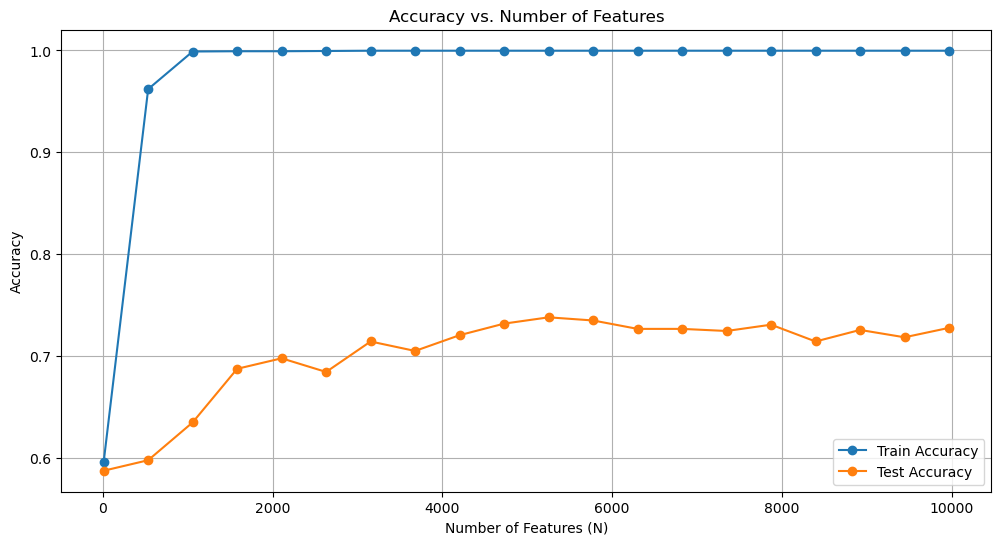

In [5]:
#
# Your code for 3.2a here!
#
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

sorted_words = [word for word, pmi in sorted_aggregated_pmi]

# Define the N values
num_unique_words = len(sorted_words)
N_values = np.linspace(10, num_unique_words, 20, dtype=int)

train_accuracies = []
test_accuracies = []

for N in N_values:
    top_n_words = sorted_words[:N]
    
    vectorizer = CountVectorizer(vocabulary=top_n_words)
    
    X_train = vectorizer.fit_transform([' '.join(sentence) for sentence in train_sentences])
    X_test = vectorizer.transform([' '.join(sentence) for sentence in test_sentences])
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, train_labels)
    
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(train_labels, train_pred)
    test_accuracy = accuracy_score(test_labels, test_pred)
    
    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(N_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(N_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Features (N)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

### 3.2b (0.25 points): Discussion
What did you expect? What did you observe?

**Your answer:**

I expected to see the accuracy of the classifier improves as the number of features increases since more features causes more information for model in case of the prediction. However, the accuracy of the model in training and test sets also increases as the number of features increases too. Moreover, the training accuracy continues to increase with more features.

---

### 3.3a (0.25 points) Stop Words
Use nltk's stop words to calculate the amount of stop words in the corpus (number of stop words divided by total number of words in the whole corpus).

### 3.3b (0.25 points):
What exactly are stop words, and why can we expect them to not have as big of a contribution to classification? Why could it be a good idea to erase them during preprocessing before training?

**Your answer:**

Stop words are conjunctions, prepositions, articles and other words which have no specific meaning in itself. These words are so frequent in different classes of text and have no distinctive information to distinguish.  The reason why it's a good idea to erase them is improving efficiency since we will have fewer words, reduces noise since these words causes noise in data and improving the performance of the model.

In [6]:
#
# Your code fore 3.3a here!
#
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

all_words = [word for sentence in preprocessed_sentences for word in sentence]

num_stop_words = sum(1 for word in all_words if word in stop_words)

total_num_words = len(all_words)

stop_word_ratio = num_stop_words / total_num_words

print(f"Number of stop words: {num_stop_words}")
print(f"Total number of words: {total_num_words}")
print(f"Proportion of stop words: {stop_word_ratio:.4f}")

Number of stop words: 35346
Total number of words: 99315
Proportion of stop words: 0.3559


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shahlajahangiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---
## 4. Bonus (3.5 Points)

### 4.1 (2 points): Sentiment Analysis Done Differently
In this exercise, we will use the [SentiWordNet](https://www.nltk.org/_modules/nltk/corpus/reader/sentiwordnet.html) lexicon from NLTK to determine the sentiment score of each word. It returns a score for 3 types of sentiments: postivie, negative and objective, which allows us to easily map these scores on our 3 labels of the FinancialPhraseBank.

Start again by preprocessing the FinancialPhraseBank by lowercasing, removing punctuation, tokenizing based on whitespaces and also using NLTK's `WordNetLemmatizer` on the tokens. Then run SentiWordNet on each word to receive the sentiment scores. Accumulate the scores for positive, negative and objective and select the highest of those as the final judgment. Next, compare those predictions against the target labels and report the accuracy.

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pjrad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.metrics import accuracy_score

nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return tokens

def get_sentiment_scores(tokens):
    pos_score = 0
    neg_score = 0
    obj_score = 0
    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            sentiment = synsets[0]  # Use the first synset
            pos_score += sentiment.pos_score()
            neg_score += sentiment.neg_score()
            obj_score += sentiment.obj_score()
    return pos_score, neg_score, obj_score

def determine_sentiment(pos_score, neg_score, obj_score):
    if max(pos_score, neg_score, obj_score) == pos_score:
        return 'positive'
    elif max(pos_score, neg_score, obj_score) == neg_score:
        return 'negative'
    else:
        return 'neutral'

data = [
    ("The company reported a significant increase in revenue.", "positive"),
    ("The quarterly results were disappointing.", "negative"),
    ("The market reaction was neutral.", "neutral"),
]

preprocessed_data = [(preprocess_text(sentence), label) for sentence, label in data]

predictions = []
for tokens, _ in preprocessed_data:
    pos_score, neg_score, obj_score = get_sentiment_scores(tokens)
    sentiment = determine_sentiment(pos_score, neg_score, obj_score)
    predictions.append(sentiment)

true_labels = [label for _, label in data]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

print("Accuracy:", accuracy)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/shahlajahangiri/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shahlajahangiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shahlajahangiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.3333333333333333


### 4.2a (1 point): Unsupervised Learning Using K-Means Clustering
K-Means Clustering is a popular unsupervised learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping groups (clusters). Each data point belongs to the cluster with the nearest mean, serving as a prototype of the cluster, so that each data point belongs to one of the $k$ clusters that has the nearest mean.
Use the code snippet below for loading and preprocessing.
Your task is to run the CountVectorizer on the sentences and then fit kmeans clustering on 3 clusters using `random_state=42`. Now predict the cluster labels for the vectorized sentences.

### 4.2b (0.5 point): Vizualization
We have not really covered dimensionality reduction techniques in this class, so the code and some background info is provided to you. The code snippet below is used to visualize your countvectorized sentences `X` against the predicted `cluster_labels`. This Principal Component Analysis (PCA) transforms high-dimensional data into a lower-dimensional form while retaining as much variance (information) as possible.
Looking at the scatter plot, how can you interpret the separation between clusters? What does it tell you about the data?


In [8]:
#
# Your code for 4.2a here!
#
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def load_dataset(file_path):
    with open(file_path, newline='', encoding="ISO-8859-1") as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
    labels = [row[0].strip().lower() for row in data]
    sentences = [row[1] for row in data]
    return labels, sentences

file_path = 'all-data.csv'
labels, sentences = load_dataset(file_path)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

print("Cluster labels:", cluster_labels)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [2 0 2 ... 1 1 0]


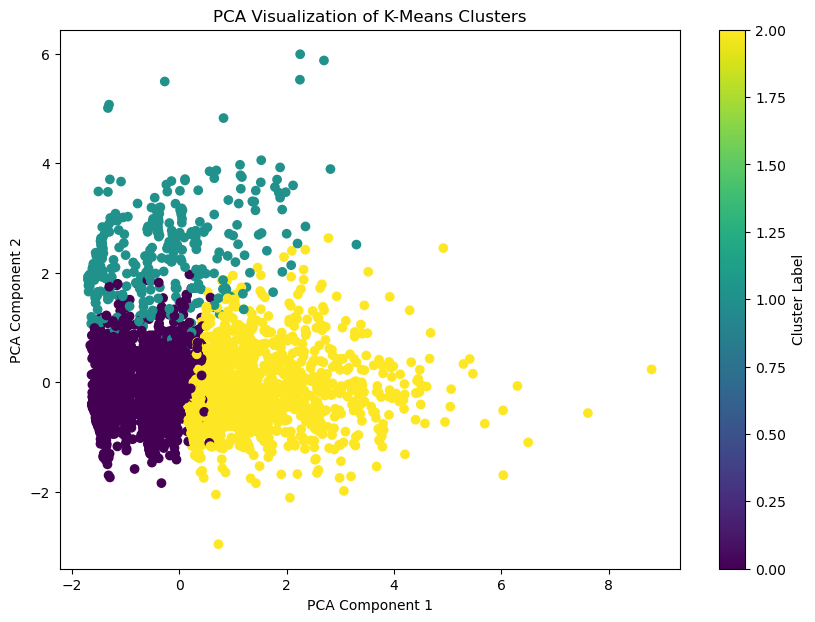

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Visualization of K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()